In [117]:
# install.packages("tidyverse")
# install.packages(("ggplot2"))
# install.packages("corrplot")
# install.packages("e1071")
# install.packages("caret")
# install.packages("caTools")
# install.packages("devtools")
# install.packages("tensorflow")


# devtools::install_github("rstudio/keras")
# devtools::install_github("rstudio/reticulate")


library(keras)
library(tensorflow)
library(keras)
library(e1071)
library(rpart)
library(caret)
library(caTools)
library(corrplot)
library(lubridate)
library(ggplot2)
library(tidyr)

In [118]:
#show the existing working directory
getwd()

#setting working directory
#setwd("D:\DS\Assignment 2")

#reading and importing the data as med_data
med_data<-read.csv("MedicalCentre.csv",header=TRUE)
med_data

[1] "/content"

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [119]:
#1
#count missing values in the data
sum(is.na(med_data))
colSums(is.na(med_data))

#removing missing values
data_after_null<-na.omit(med_data);

#check data after removing null values
sum(is.na(data_after_null))

[1] 3

PatientId  AppointmentID         Gender   ScheduledDay AppointmentDay 
             0              0              0              0              0 
           Age  Neighbourhood    Scholarship   Hipertension       Diabetes 
             3              0              0              0              0 
    Alcoholism        Handcap   SMS_received        No.show 
             0              0              0              0

[1] 0

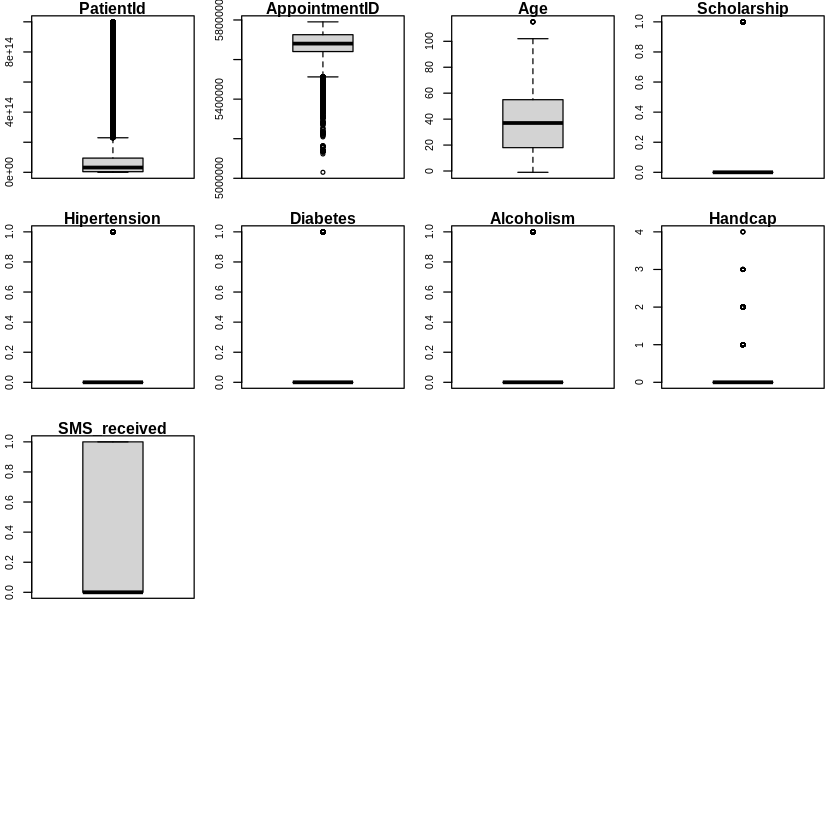

In [120]:
#2
plot_all_features <- function(data) {
  # Exclude non-numeric columns
  numeric_cols <- sapply(data, is.numeric)
  data_numeric <- data[, numeric_cols]

  # Set up a 4x4 grid of plots
  par(mfrow=c(4, 4), mar=c(2, 2, 1, 1))

  # Create boxplots for each numeric column
  for (i in 1:ncol(data_numeric)) {
    boxplot(data_numeric[, i], main=names(data_numeric)[i], cex.axis=0.8)
  }
}

plot_data<-data_after_null[,c(1,2,6,8,9,10,11,12,13)]

# Call the function to plot all features
plot_all_features(plot_data)


In [121]:
#3
neg_age<-sum(data_after_null$Age<0)
neg_age
data_after_null<-data_after_null[data_after_null$Age>=0,]
data_after_null

[1] 1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
3,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [122]:
#4
data_after_null$AwaitingTime<-as.numeric(difftime(as.POSIXct(data_after_null$ScheduledDay,tz = "UTC"), as.POSIXct(data_after_null$AppointmentDay,tz = "UTC"),units = "day"))
data_after_null$AwaitingTime <- abs(data_after_null$AwaitingTime)
data_after_null
#data_after_null$AwaitingTime <- gsub("day", "", data_after_null$AwaitingTime)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,AwaitingTime
,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
2,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
3,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
4,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
5,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
6,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2
7,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
9,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0


In [123]:
#5
data_after_null$Gender <-  ifelse(data_after_null$Gender == "M", 1, 0)
data_after_null$No.show<- ifelse(data_after_null$No.show == "Yes", 1, 0)
data_after_null$Neighbourhood<-  as.integer( factor(data_after_null$Neighbourhood,labels = c(0:80)))
data_after_null

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,AwaitingTime
,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,40,0,1,0,0,0,0,0,0
2,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,40,0,0,0,0,0,0,0,0
3,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,47,0,0,0,0,0,0,0,0
4,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,55,0,0,0,0,0,0,0,0
5,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,40,0,1,1,0,0,0,0,0
6,9.598510e+13,5626772,0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,59,0,1,0,0,0,0,0,2
7,7.336880e+14,5630279,0,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,26,0,0,0,0,0,0,1,2
8,3.449830e+12,5630575,0,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,26,0,0,0,0,0,0,1,2
9,5.639470e+13,5638447,0,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,2,0,0,0,0,0,0,0,0


In [124]:
#6
data_after_null$ScheduledDay<- as.Date(data_after_null$ScheduledDay)
data_after_null$Scheduled_year<-year(data_after_null$ScheduledDay)
data_after_null$Scheduled_mon<-month(data_after_null$ScheduledDay)
data_after_null$Scheduled_day<-day(data_after_null$ScheduledDay)
#$Scheduled_hour<-format(SD,"%h")

data_after_null$AppointmentDay <- as.Date(data_after_null$AppointmentDay)
data_after_null$Appointment_year<-year(data_after_null$AppointmentDay)
data_after_null$Appointment_mon<-month(data_after_null$AppointmentDay)
data_after_null$Appointment_day<-day(data_after_null$AppointmentDay)
#$Scheduled_hour<-format(SD,"%h")
data_after_null

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,⋯,Handcap,SMS_received,No.show,AwaitingTime,Scheduled_year,Scheduled_mon,Scheduled_day,Appointment_year,Appointment_mon,Appointment_day
,<dbl>,<int>,<dbl>,<date>,<date>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,40,0,1,0,⋯,0,0,0,0,2016,4,29,2016,4,29
2,5.589980e+14,5642503,1,2016-04-29,2016-04-29,56,40,0,0,0,⋯,0,0,0,0,2016,4,29,2016,4,29
3,4.262960e+12,5642549,0,2016-04-29,2016-04-29,62,47,0,0,0,⋯,0,0,0,0,2016,4,29,2016,4,29
4,8.679510e+11,5642828,0,2016-04-29,2016-04-29,8,55,0,0,0,⋯,0,0,0,0,2016,4,29,2016,4,29
5,8.841190e+12,5642494,0,2016-04-29,2016-04-29,56,40,0,1,1,⋯,0,0,0,0,2016,4,29,2016,4,29
6,9.598510e+13,5626772,0,2016-04-27,2016-04-29,76,59,0,1,0,⋯,0,0,0,2,2016,4,27,2016,4,29
7,7.336880e+14,5630279,0,2016-04-27,2016-04-29,23,26,0,0,0,⋯,0,0,1,2,2016,4,27,2016,4,29
8,3.449830e+12,5630575,0,2016-04-27,2016-04-29,39,26,0,0,0,⋯,0,0,1,2,2016,4,27,2016,4,29
9,5.639470e+13,5638447,0,2016-04-29,2016-04-29,21,2,0,0,0,⋯,0,0,0,0,2016,4,29,2016,4,29


In [125]:
#7
z_score_standardize <- function(x) {
  (x - mean(x)) / sd(x)
}

# Apply z-score standardization to 'Age' feature
data_after_null$Age <- z_score_standardize(data_after_null$Age)
str(data_after_null)


'data.frame':	110523 obs. of  21 variables:
 $ PatientId       : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ AppointmentID   : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ Gender          : num  0 1 0 0 0 0 0 0 0 0 ...
 $ ScheduledDay    : Date, format: "2016-04-29" "2016-04-29" ...
 $ AppointmentDay  : Date, format: "2016-04-29" "2016-04-29" ...
 $ Age             : num  1.078 0.818 1.078 -1.259 0.818 ...
 $ Neighbourhood   : int  40 40 47 55 40 59 26 26 2 13 ...
 $ Scholarship     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension    : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes        : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show         : num  0 0 0 0 0 0 1 1 0 0 ...
 $ AwaitingTime    : num  0 0 0 0 0 2 2 2 0 2 ...
 $ Scheduled_year  : num  2016 2016 2016 2016 2016 ...
 $ Scheduled_mon

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



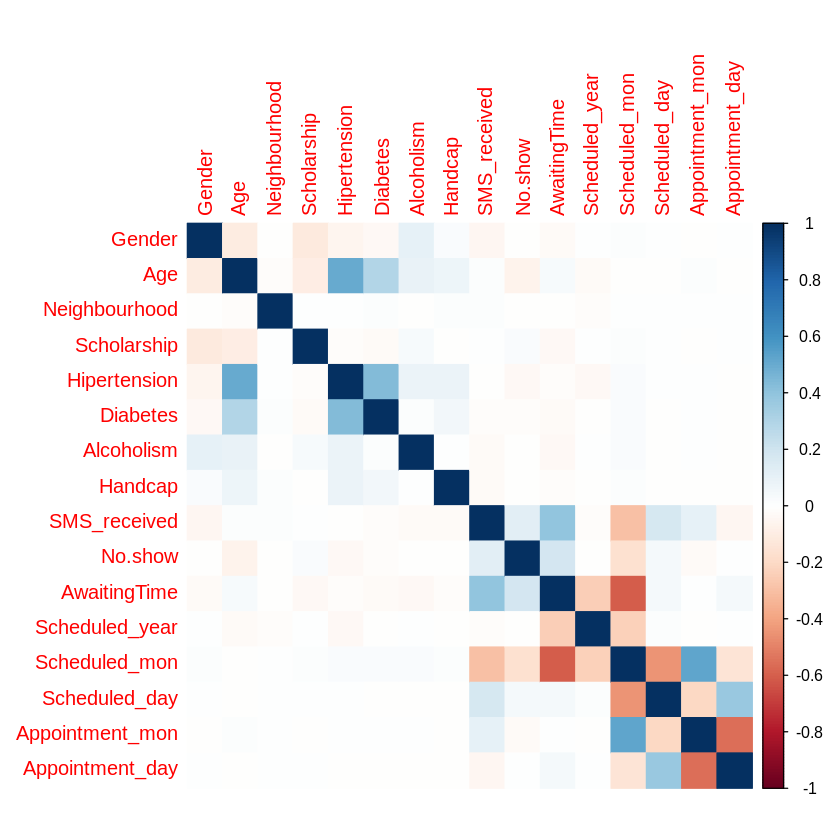

In [126]:
#8
# Install caret package
install.packages("caret")

# Load caret package
library(caret)
cor_data<-data_after_null[,c(-1,-2,-4,-5, -19)]
cor_matrix <- cor(cor_data)
corrplot(cor_matrix,method="color")
cor_threshold <- 0.7
# Preprocess the data
preprocessed_data <- preProcess(cor_data, method = "corr")

# Find highly correlated features
highly_correlated <- findCorrelation(cor_matrix, cutoff = cor_threshold)

# Drop highly correlated features from the dataset
model_data <- predict(preprocessed_data, newdata = cor_data, type = "filtered")



In [127]:
set.seed(123)

sample <- sample.split(model_data$No.show, SplitRatio = 0.70)
train <- subset(model_data, sample == TRUE)
test <- subset(model_data, sample == FALSE)


In [49]:
# Train SVM classifier
svm_model <- svm(No.show ~ ., data = train,  type = 'C-classification', kernel = 'linear')
# Predict using SVM classifier
svm_pred <- predict(svm_model, newdata = test)
# Evaluate model performance
confMatrixs <- table(svm_pred, as.factor(test$No.show))
svm_accuracy <- sum(diag(confMatrixs)) / sum(confMatrixs)
print(svm_accuracy)


[1] 0.7980517


In [136]:
# Train DT classifier
dtclassifier <- rpart(No.show ~ ., data = train, method = "class")
# Make predictions on test data
predictions <- predict(dtclassifier, newdata = test, type = "class")
# Evaluate model performance
confMatrix <- table(predictions, test$No.show)
dt_accuracy <- sum(diag(confMatrix)) / sum(confMatrix)



In [51]:
x_train <- train[,-10 ]
y_train <- train[10]
x_test <- test[,-10 ]
y_test <-test[,10]

In [52]:
y_train<-to_categorical(y_train,15)
y_test<-to_categorical(y_test,15)

In [53]:
#x_train <- array_reshape(x_train, dim = c(dim(x_train)[1], prod(dim(x_train)[-1]))) / max(x_train)
#x_test <- array_reshape(x_test, dim = c(dim(x_test)[1], prod(dim(x_test)[-1]))) / max(x_test)
x_train <- apply(x_train, 2, as.numeric)
x_test <- apply(x_test,2,as.numeric)

In [54]:
#loading keras library
model <- keras_model_sequential()

In [55]:
model %>%
  layer_dense(units = dim(x_train)[2], input_shape = dim(x_train)[2]) %>%
  layer_dropout(rate=0.4)%>%
  layer_activation(activation = 'relu') %>%
  layer_dense(units = 15) %>%
  layer_activation(activation = 'softmax')


In [56]:
#compiling the defined model with metric = accuracy and optimiser as adam.
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)

In [57]:
#fitting the model on the training dataset
model %>% fit(x_train, y_train, epochs = 1, batch_size = 128)

#Evaluating model on the cross validation dataset
loss_and_metrics <- model %>% evaluate(x_test,y_test, batch_size = 128)

loss_and_metrics

loss  accuracy 
0.5086253 0.7977803

In [109]:
# Define function to calculate model accuracy
model_accuracy <- function(model, test_data,train_data) {
  # Make predictions on test set
  pred_labels <- predict(model, newdata = test_data,type = "class")

  # Calculate confusion matrix and accuracy
  conf_matrix <- table(pred_labels, test_data$No.show)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

  # Check for overfitting
  train_pred_labels <- predict(model, newdata = train_data,type = "class")
  train_conf_matrix <- table(train_pred_labels, train_data$No.show)
  train_accuracy <- sum(diag(train_conf_matrix)) / sum(train_conf_matrix)
  if (round(accuracy) < round(train_accuracy)) {
    overfitting <- TRUE
  } else {
    overfitting <- FALSE
  }

  # Return accuracy and overfitting status
  return(list(accuracy = round(accuracy,4),train_Accuracy=round(train_accuracy,4), overfitting = overfitting))
}

In [139]:
model_accuracy(dtclassifier,test,train)

$accuracy
[1] 0.7981

$train_Accuracy
[1] 0.7981

$overfitting
[1] FALSE

In [140]:
model_accuracy(svm_model,test,train)

$accuracy
[1] 0.7981

$train_Accuracy
[1] 0.7981

$overfitting
[1] FALSE

In [115]:
# Convert the outcome variable to a factor variable
train$No.show <- factor(train$No.show)

# Remove any observations with missing values
train <- na.omit(train)

# Define the hyperparameter grid to search over
param_grid <- expand.grid(cp = seq(0, 0.1, 0.01))

# Define the train control object for cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Perform the grid search
dt_model <- train(No.show ~ ., data = train, method = "rpart",
                  tuneGrid = param_grid, trControl = ctrl)

# Print the best hyperparameters and cross-validation score
print(dt_model$bestTune)
print(dt_model$results$Accuracy)

    cp
11 0.1
 [1] 0.7587183 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
 [8] 0.7980637 0.7980637 0.7980637 0.7980637


In [137]:
confusionMatrix(data = as.factor(predictions), reference =as.factor( test$No.show))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 26461  6696
         1     0     0
                                          
               Accuracy : 0.7981          
                 95% CI : (0.7937, 0.8024)
    No Information Rate : 0.7981          
    P-Value [Acc > NIR] : 0.5033          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7981          
         Neg Pred Value :    NaN          
             Prevalence : 0.7981          
         Detection Rate : 0.7981          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                  

In [142]:
confusionMatrix(data = as.factor(svm_pred), reference =as.factor( test$No.show))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 26461  6696
         1     0     0
                                          
               Accuracy : 0.7981          
                 95% CI : (0.7937, 0.8024)
    No Information Rate : 0.7981          
    P-Value [Acc > NIR] : 0.5033          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7981          
         Neg Pred Value :    NaN          
             Prevalence : 0.7981          
         Detection Rate : 0.7981          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                  

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



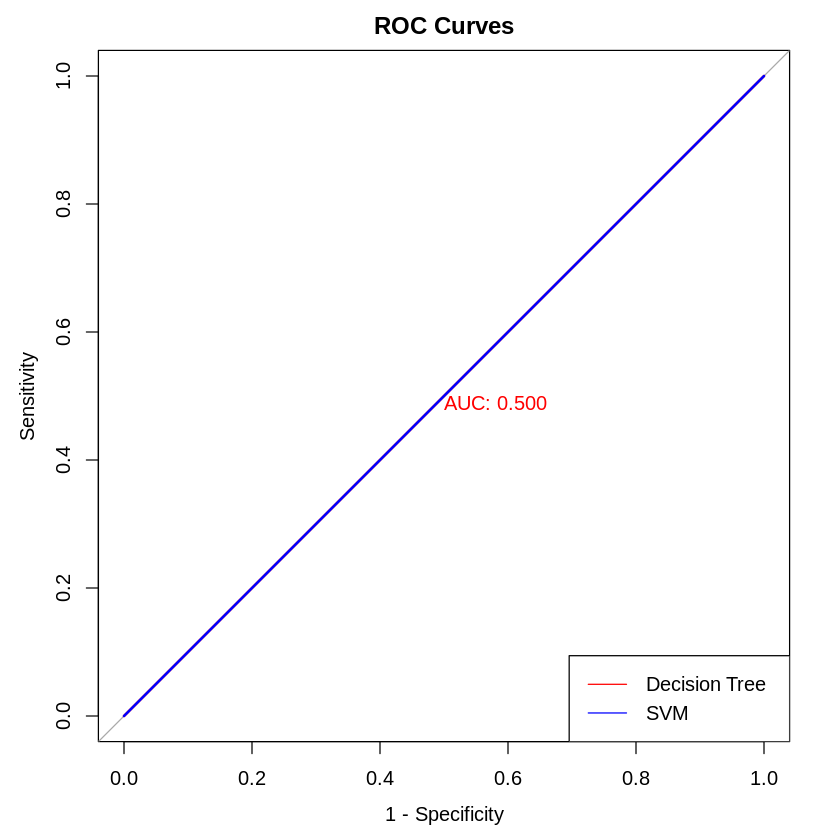

In [146]:
library(pROC)
roc_obj1 <- roc(test$No.show, as.numeric(predictions))
plot(roc_obj1, col = "red", main = "ROC Curves",  print.auc = TRUE,legacy.axes = TRUE)

# Add the second ROC curve to the plot
roc_obj2 <- roc(test$No.show, as.numeric(svm_pred))
lines(roc_obj2, col = "blue")

# Add a legend to the plot
legend("bottomright", legend = c("Decision Tree","SVM"), col = c("red", "blue"), lty = 1)

In [ ]:
#part 2

In [ ]:
# Load library
library(ggplot2)
library(cluster)

In [ ]:
# Load the Framingham dataset
data <- read.csv("framingham.csv")

In [ ]:
# Select the columns (Sex,Age)
new_data <- data[, c("male", "age")]

In [ ]:
# Standardize column('Age')
new_data$age <- scale(new_data$age)

In [ ]:
# Perform k-means clustering with k=4
set.seed(50)
kmeans_model <- kmeans(new_data, centers = 4)

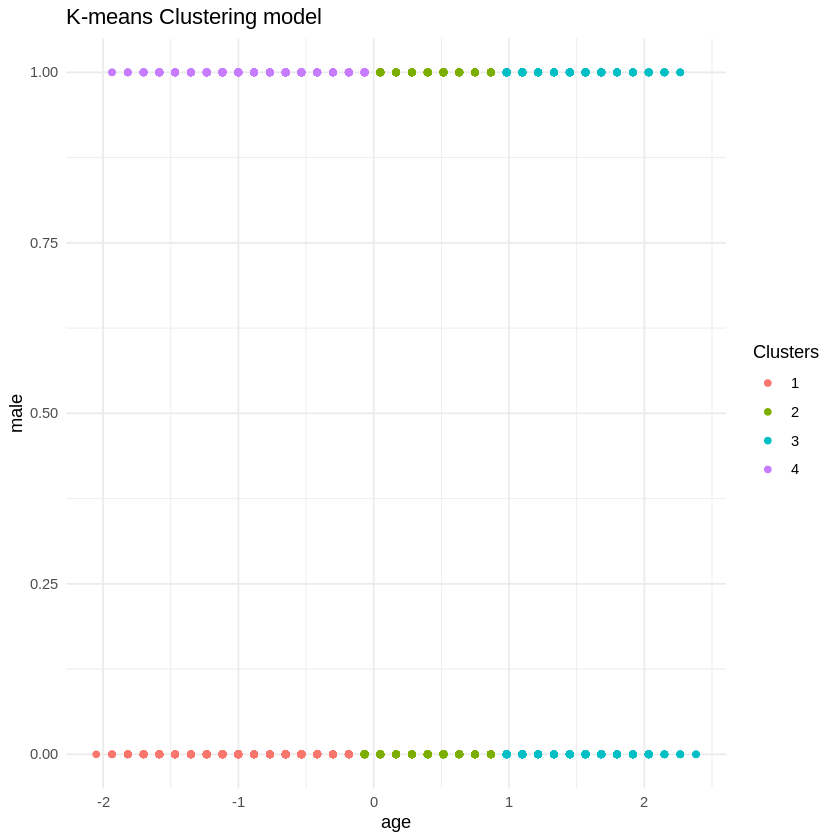

In [ ]:
# Plot the clusters
ggplot(new_data, aes(x = age, y = male, color = as.factor(kmeans_model$cluster))) +
  geom_point() +
  labs(title = "K-means Clustering model", color = "Clusters") +
  theme_minimal()

In [ ]:
# Apply the elbow method
points <- c()
for (i in 1:10) {
  kmeans_model <- kmeans(new_data, centers = i)
  points <- append(points, kmeans_model$tot.withinss)
}

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


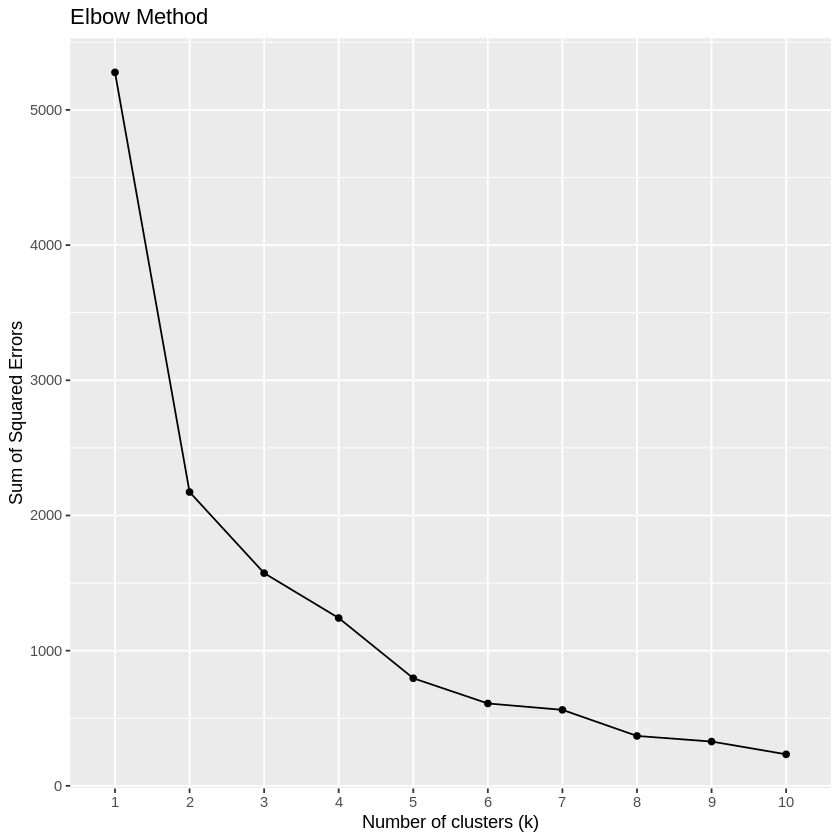

In [ ]:
# Plot the points for each value of k
ggplot(data.frame(k = 1:10, p = points), aes(x = as.factor(k), y = p )) +
  geom_line() +
  geom_point() +
  geom_line(aes(group = 1)) +
  labs(title = "Elbow Method", x = "Number of clusters (k)", y = "Sum of Squared Errors") +
  scale_x_discrete(breaks = 1:10)

In [ ]:
#  Evaluate the quality of the clusters using the Silhouette Coefficient
silhouette_score <- silhouette(kmeans_model$cluster, dist(new_data))
avg_silhouette <- mean(silhouette_score[,"sil_width"])


In [ ]:
# Print the average Silhouette Coefficient
cat("Average Silhouette Coefficient:", avg_silhouette)

Average Silhouette Coefficient: 0.5394031